In [1]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from torch_geometric.loader import DataLoader
from sklearn.linear_model import Lasso
import warnings
from sklearn.linear_model import ElasticNet
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import torch
import os
import pandas as pd

from mmfdl.util.utils_smiecfp import *
from mmfdl.util.data_gen_modify import *
from mmfdl.util.analysis import *
from mmfdl.util.utils import formDataset_Single

from mmfdl.model.model_combination import *

warnings.filterwarnings("ignore", category=UserWarning, module="torch_geometric")
# CUDA 컨텍스트 관련 경고 무시
warnings.filterwarnings("ignore", message=".*Attempting to run cuBLAS.*", category=UserWarning)
# torch.load weights_only 경고 무시
warnings.filterwarnings("ignore", category=FutureWarning, message=".*weights_only.*")

gpu_index = 0
# CUDA 컨텍스트 명시적 초기화
if torch.cuda.is_available():
    _ = torch.zeros(1).cuda()
device = torch.device(f'cuda:{gpu_index}' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda:0


In [2]:
# 설정 파라미터
dataset_name = 'selectivity'
task_name = 'Kd'
start_fold = 1
end_fold = 5
epochs = 50
batch_size = 256
random_state = 42

argsCom = {
    'num_features_smi': 44,
    'num_features_ecfp': 2048,
    'num_features_x': 78,
    'dropout': 0.1, 
    'num_layer': 2,
    'num_heads': 2,
    'hidden_dim': 256,
    'output_dim': 128,
    'n_output': 1
}

print('=' * 60)
print(f'Starting training for {dataset_name} {task_name}')
print(f'Folds: {start_fold} to {end_fold}')
print('=' * 60)

# 모든 fold의 metrics를 저장할 리스트
all_fold_metrics = []

Starting training for selectivity Kd
Folds: 1 to 5



Processing Fold 1
Loading datasets for selectivity Kd fold 1
Train samples: 399
Validation samples: 45
Test samples: 112
Running EPOCH 1
train avg_loss is:  0.5098799260131888
val avg_loss is:  0.6476985783420807


Running EPOCH 2
train avg_loss is:  0.45387905971105025
val avg_loss is:  0.6041903688031366


Running EPOCH 3
train avg_loss is:  0.4524797768107449
val avg_loss is:  0.5866398615081437


Running EPOCH 4
train avg_loss is:  0.40774889818364657
val avg_loss is:  0.5630524494745809


Running EPOCH 5
train avg_loss is:  0.37661426836962325
val avg_loss is:  0.5496011633586529


Running EPOCH 6
train avg_loss is:  0.38222625077577976
val avg_loss is:  0.5330326140718463


Running EPOCH 7
train avg_loss is:  0.3788045603441742
val avg_loss is:  0.5102497674702625


Running EPOCH 8
train avg_loss is:  0.3765763280647671
val avg_loss is:  0.4923906290842402


Running EPOCH 9
train avg_loss is:  0.3782738531605333
val avg_loss is:  0.4879275124603311


Running EPOCH 10
train avg_l

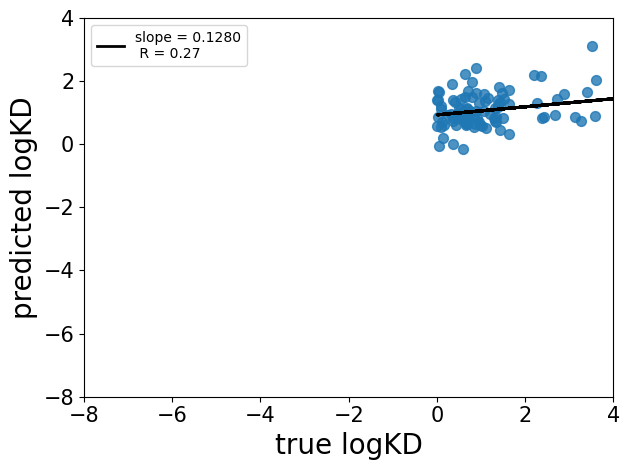

Validation data saved: ./result/SGD/selectivity/Kd/fold1/selectivity_Kd_fold1_validation_256_50_42_data.csv

Fold 1 completed!

Processing Fold 2
Loading datasets for selectivity Kd fold 2
Train samples: 400
Validation samples: 45
Test samples: 111
Running EPOCH 1
train avg_loss is:  0.6163823605318116
val avg_loss is:  0.9476289689604248


Running EPOCH 2
train avg_loss is:  0.5095740900514943
val avg_loss is:  0.8925965023519655


Running EPOCH 3
train avg_loss is:  0.516515245990087
val avg_loss is:  0.8428682436566114


Running EPOCH 4
train avg_loss is:  0.48917068617848103
val avg_loss is:  0.802807992931522


Running EPOCH 5
train avg_loss is:  0.4711985234812043
val avg_loss is:  0.8025493166689531


Running EPOCH 6
train avg_loss is:  0.44156016362633277
val avg_loss is:  0.7613586888138801


Running EPOCH 7
train avg_loss is:  0.4478980552991604
val avg_loss is:  0.7403987225010202


Running EPOCH 8
train avg_loss is:  0.4162139302417769
val avg_loss is:  0.7102642354428425



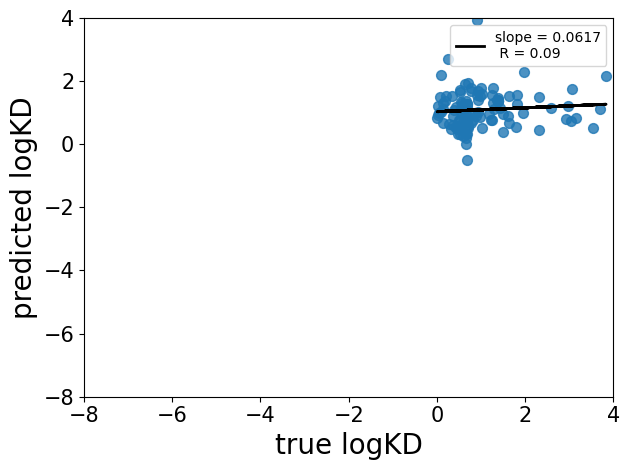

Validation data saved: ./result/SGD/selectivity/Kd/fold2/selectivity_Kd_fold2_validation_256_50_42_data.csv

Fold 2 completed!

Processing Fold 3
Loading datasets for selectivity Kd fold 3
Train samples: 400
Validation samples: 45
Test samples: 111
Running EPOCH 1
train avg_loss is:  0.6294229433649762
val avg_loss is:  0.9391547588693143


Running EPOCH 2
train avg_loss is:  0.489536690837005
val avg_loss is:  0.8157757403811302


Running EPOCH 3
train avg_loss is:  0.45055247422323413
val avg_loss is:  0.7577726938534789


Running EPOCH 4
train avg_loss is:  0.42751154493006527
val avg_loss is:  0.7446906609823268


Running EPOCH 5
train avg_loss is:  0.42133786328833234
val avg_loss is:  0.7129638565648265


Running EPOCH 6
train avg_loss is:  0.39675416104211586
val avg_loss is:  0.6870631089223543


Running EPOCH 7
train avg_loss is:  0.3670624703800469
val avg_loss is:  0.666311849611892


Running EPOCH 8
train avg_loss is:  0.3776731249653936
val avg_loss is:  0.6694523448994896

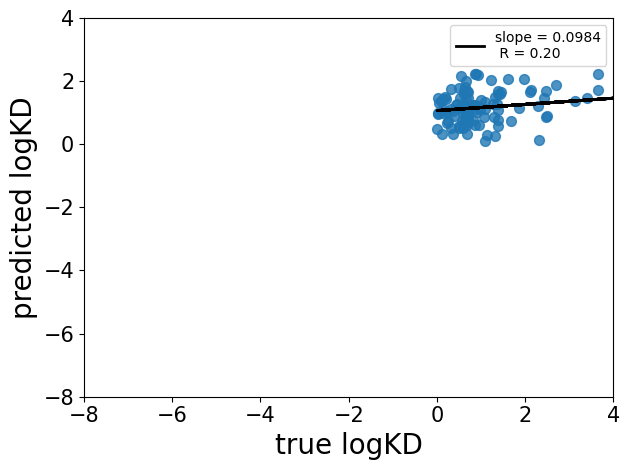

Validation data saved: ./result/SGD/selectivity/Kd/fold3/selectivity_Kd_fold3_validation_256_50_42_data.csv

Fold 3 completed!

Processing Fold 4
Loading datasets for selectivity Kd fold 4
Train samples: 400
Validation samples: 45
Test samples: 111
Running EPOCH 1
train avg_loss is:  0.8652086845526941
val avg_loss is:  0.7271164559839289


Running EPOCH 2
train avg_loss is:  0.6912803209148131
val avg_loss is:  0.5994043741374392


Running EPOCH 3
train avg_loss is:  0.5788925235480389
val avg_loss is:  0.5531349027923602


Running EPOCH 4
train avg_loss is:  0.5857415184650542
val avg_loss is:  0.5368332759896468


Running EPOCH 5
train avg_loss is:  0.5757655691641397
val avg_loss is:  0.499878292101029


Running EPOCH 6
train avg_loss is:  0.5811967316555297
val avg_loss is:  0.480226567008849


Running EPOCH 7
train avg_loss is:  0.4888954057579021
val avg_loss is:  0.4539884162682606


Running EPOCH 8
train avg_loss is:  0.49843757706519665
val avg_loss is:  0.4354504707664613




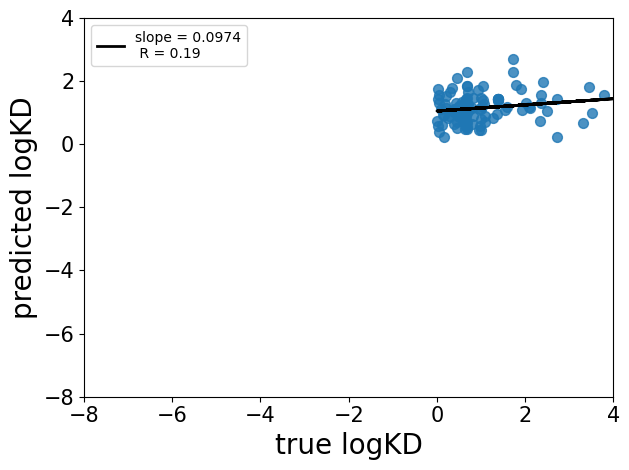

Validation data saved: ./result/SGD/selectivity/Kd/fold4/selectivity_Kd_fold4_validation_256_50_42_data.csv

Fold 4 completed!

Processing Fold 5
Loading datasets for selectivity Kd fold 5
Train samples: 400
Validation samples: 45
Test samples: 111
Running EPOCH 1
train avg_loss is:  0.5720397000603223
val avg_loss is:  0.5578880412311092


Running EPOCH 2
train avg_loss is:  0.4769812431286601
val avg_loss is:  0.48499428257438565


Running EPOCH 3
train avg_loss is:  0.43775569985068513
val avg_loss is:  0.48453357935276764


Running EPOCH 4
train avg_loss is:  0.44852379205902915
val avg_loss is:  0.47446933197272934


Running EPOCH 5
train avg_loss is:  0.42963023336148937
val avg_loss is:  0.47176496176992533


Running EPOCH 6
train avg_loss is:  0.41646367405229645
val avg_loss is:  0.4447686863147527


Running EPOCH 7
train avg_loss is:  0.41088804920524735
val avg_loss is:  0.44028801816216645


Running EPOCH 8
train avg_loss is:  0.4138752499273703
val avg_loss is:  0.44259924

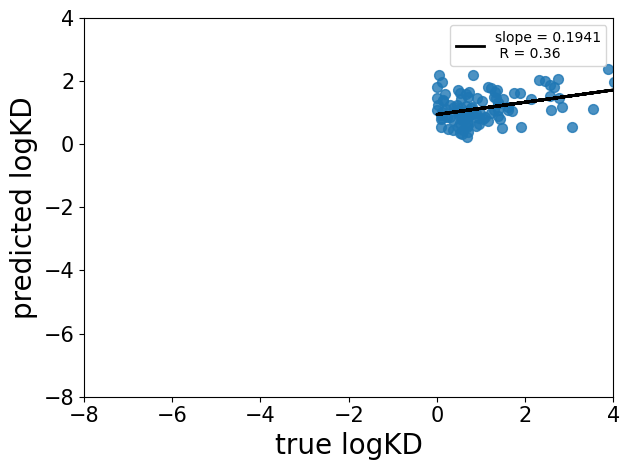

Validation data saved: ./result/SGD/selectivity/Kd/fold5/selectivity_Kd_fold5_validation_256_50_42_data.csv

Fold 5 completed!

All folds completed!

Summary metrics saved: ./result/SGD/selectivity/Kd/summary_metric.csv

Summary Metrics (Test Set):
metric      mean      std
  rmse  0.955719 0.092812
    r2 -0.087548 0.178458
   pcc  0.220505 0.100747
All folds metrics saved: ./result/SGD/selectivity/Kd/all_folds_metrics.csv


In [ ]:
# Fold별 반복 실행
for fold_num in range(start_fold, end_fold + 1):
    print('\n' + '=' * 60)
    print(f'Processing Fold {fold_num}')
    print('=' * 60)
    
    # Fold별 설정
    label = f'{dataset_name}_{task_name}_fold{fold_num}'
    resultLoss = {'losses_train': [], 'losses_val': []}
    
    # 데이터 경로 설정
    data_dir = f'./data/{dataset_name}/{task_name}/fold{fold_num}'
    
    # 데이터셋 로드
    print(f'Loading datasets for {dataset_name} {task_name} fold {fold_num}')
    train_data = formDataset_Single(root=data_dir, dataset=f'{dataset_name}_train')
    val_data = formDataset_Single(root=data_dir, dataset=f'{dataset_name}_val')
    test_data = formDataset_Single(root=data_dir, dataset=f'{dataset_name}_test')
    
    # DataLoader 생성
    trainLoader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    valLoader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
    testLoader = DataLoader(test_data, batch_size=batch_size, shuffle=False, drop_last=False)
    
    print(f'Train samples: {len(train_data)}')
    print(f'Validation samples: {len(val_data)}')
    print(f'Test samples: {len(test_data)}')
    print('=' * 60)
    
    # 모델 초기화
    learning_rate = 0.0001
    com_model = comModel(argsCom).to(device)
    optimizer_com = torch.optim.Adam(com_model.parameters(), lr=learning_rate)
    criterion_com = torch.nn.MSELoss()

    com_model.train()
    for i in range(epochs):
        print("Running EPOCH", i+1)
        total_loss = 0
        n_batches = 0
        '''
            train部分
        '''
        for batch_idx, data in enumerate(trainLoader):
            encodedSmi = torch.LongTensor(data.smi).to(device)
            encodedSmi_mask = torch.LongTensor(getInput_mask(data.smi)).to(device)
            ecfp = torch.FloatTensor(data.ep).to(device)
            y = data.y.to(device)
            x = data.x.to(device)
            edge_index = data.edge_index.to(device)
            batch = data.batch.to(device)
            y_pred = com_model(encodedSmi, encodedSmi_mask, ecfp, x, edge_index, batch)
            
            loss1 = criterion_com(y_pred[0].type(torch.DoubleTensor), y.type(torch.DoubleTensor))
            loss2 = criterion_com(y_pred[1].type(torch.DoubleTensor), y.type(torch.DoubleTensor))
            loss3 = criterion_com(y_pred[2].type(torch.DoubleTensor), y.type(torch.DoubleTensor))
            loss = (loss1 + loss2 + loss3) / 3
            total_loss += (loss.data)/3
            optimizer_com.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(com_model.parameters(),0.5)
            optimizer_com.step()
            n_batches+=1
            torch.cuda.empty_cache()
        avg_loss = total_loss / n_batches
        resultLoss['losses_train'].append(avg_loss)
        print('train avg_loss is: ', avg_loss.item())

        '''
            val部分
        '''
        total_loss = 0
        n_batches = 0
        for batch_idx, data in enumerate(valLoader):
            encodedSmi = torch.LongTensor(data.smi).to(device)
            encodedSmi_mask = torch.LongTensor(getInput_mask(data.smi)).to(device)
            ecfp = torch.FloatTensor(data.ep).to(device)
            y = data.y.to(device)
            x = data.x.to(device)
            edge_index = data.edge_index.to(device)
            batch = data.batch.to(device)
            y_pred = com_model(encodedSmi, encodedSmi_mask, ecfp, x, edge_index, batch) 
            loss1 = criterion_com(y_pred[0].type(torch.DoubleTensor), y.type(torch.DoubleTensor))
            loss2 = criterion_com(y_pred[1].type(torch.DoubleTensor), y.type(torch.DoubleTensor))
            loss3 = criterion_com(y_pred[2].type(torch.DoubleTensor), y.type(torch.DoubleTensor))
            loss = (loss1 + loss2 + loss3) / 3
            total_loss += (loss.data)/3
            optimizer_com.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(com_model.parameters(),0.5)
            optimizer_com.step()
            n_batches+=1
        avg_loss = total_loss / n_batches
        resultLoss['losses_val'].append(avg_loss) 
        print('val avg_loss is: ', avg_loss.item())
        print('\n')

    val_data = []
    pred_data1 = []
    pred_data2 = []
    pred_data3 = []
    com_model.eval()
    for batch_idx, data in enumerate(valLoader):
        encodedSmi = torch.LongTensor(data.smi).to(device)
        encodedSmi_mask = torch.LongTensor(getInput_mask(data.smi)).to(device)
        ecfp = torch.FloatTensor(data.ep).to(device)
        y = data.y.to(device)
        x = data.x.to(device)
        edge_index = data.edge_index.to(device)
        batch = data.batch.to(device)
        y_pred = com_model(encodedSmi, encodedSmi_mask, ecfp, x, edge_index, batch)
        val_data.append(y.tolist())
        pred_data1.append(y_pred[0].tolist())
        pred_data2.append(y_pred[1].tolist())
        pred_data3.append(y_pred[2].tolist()) 

    def flattened_data(data):
        fla_data = [item for sublist in data for item in sublist]
        merged_data = np.array(fla_data).flatten() 
        return merged_data

    # 为了写入val预测值和真实值
    data_ = {}
    data_['pred1'] = flattened_data(pred_data1)
    data_['pred2'] = flattened_data(pred_data2)
    data_['pred3'] = flattened_data(pred_data3)
    data_['true'] = flattened_data(val_data)

    # 做权重分析
    val_data_flat = flattened_data(val_data).astype(np.float32)
    pred_data1_flat = flattened_data(pred_data1).astype(np.float32)
    pred_data2_flat = flattened_data(pred_data2).astype(np.float32)
    pred_data3_flat = flattened_data(pred_data3).astype(np.float32)

    learning_rate_weight = 0.01
    weights = torch.tensor([0.7, 0.2, 0.1], requires_grad=True, dtype=torch.float)
    optimizer_weight = torch.optim.SGD([weights], lr=learning_rate_weight)
    criterion_weight = torch.nn.MSELoss()

    val_data_tensor = torch.from_numpy(val_data_flat)
    pred_data1_tensor = torch.from_numpy(pred_data1_flat)
    pred_data2_tensor = torch.from_numpy(pred_data2_flat)
    pred_data3_tensor = torch.from_numpy(pred_data3_flat)
    for i in range(epochs):
        print("Running EPOCH", i+1)
        if weights.data.sum() > 1:
            # 如果总和大于1，进行归一化处理
            weights.data /= weights.data.sum()
        # Compute weighted_output using torch operations, not .detach().numpy()
        weighted_output = (weights[0] * pred_data1_tensor + weights[1] * pred_data2_tensor + weights[2] * pred_data3_tensor).to(device)
        val_output = val_data_tensor.to(device)
        loss = criterion_weight(weighted_output, val_output)
        optimizer_weight.zero_grad()
        loss.backward()
        optimizer_weight.step()
        print('weight loss is: ', loss.item())
    print('\n')

    # 为了写入权重
    numpy_weights = weights.detach().numpy()
    weightDic = {}
    weightDic[1] = numpy_weights[0]
    weightDic[2] = numpy_weights[1]
    weightDic[3] = numpy_weights[2]
    print(weightDic)

    def calRmseMae(y, y_pred):
        yResult = {}
        ground_truth = y
        predictions = y_pred
        # calculate rmse
        squared_errors = (ground_truth - predictions) ** 2
        rmse = np.sqrt(np.mean(squared_errors))
        yResult['rmse'] = rmse
        # calculate mae
        absolute_errors = np.abs(ground_truth - predictions)
        mae = np.mean(absolute_errors)
        yResult['mae'] = mae
        return yResult

    sour_data = []
    pred_data1 = []
    pred_data2 = []
    pred_data3 = []

    com_model.eval()
    for batch_idx, data in enumerate(testLoader):
        encodedSmi = torch.LongTensor(data.smi).to(device)
        encodedSmi_mask = torch.LongTensor(getInput_mask(data.smi)).to(device)
        ecfp = torch.FloatTensor(data.ep).to(device)
        y = data.y.to(device)
        x = data.x.to(device)
        edge_index = data.edge_index.to(device)
        batch = data.batch.to(device)
        y_pred = com_model(encodedSmi, encodedSmi_mask, ecfp, x, edge_index, batch)  
        sour_data.append(y.tolist())
        pred_data1.append(y_pred[0].tolist())
        pred_data2.append(y_pred[1].tolist())
        pred_data3.append(y_pred[2].tolist()) 
    yPred = numpy_weights[0] * flattened_data(pred_data1) + numpy_weights[1] * flattened_data(pred_data2) + numpy_weights[2] * flattened_data(pred_data3)
    ySour = flattened_data(sour_data)
    
    # 데이터 길이 체크
    if len(yPred) == 0 or len(ySour) == 0:
        print(f'Warning: Empty predictions or targets. yPred length={len(yPred)}, ySour length={len(ySour)}')
        print(f'Skipping result saving for fold {fold_num}')
        continue
    
    if len(yPred) != len(ySour):
        print(f'Warning: Length mismatch. yPred length={len(yPred)}, ySour length={len(ySour)}. Truncating to min length.')
        min_len = min(len(yPred), len(ySour))
        yPred = yPred[:min_len]
        ySour = ySour[:min_len]

    # Metrics 계산 (RMSE, R2, PCC)
    rmse = np.sqrt(mean_squared_error(ySour, yPred))
    r2 = r2_score(ySour, yPred)
    pcc, pcc_pvalue = pearsonr(ySour, yPred)
    
    # Fold별 metrics 저장
    fold_metrics = {
        'fold': fold_num,
        'rmse': rmse,
        'r2': r2,
        'pcc': pcc,
        'pcc_pvalue': pcc_pvalue
    }
    all_fold_metrics.append(fold_metrics)
    
    print(f'Fold {fold_num} Metrics:')
    print(f'  RMSE: {rmse:.4f}')
    print(f'  R2: {r2:.4f}')
    print(f'  PCC: {pcc:.4f} (p-value: {pcc_pvalue:.4e})')
    print('\n')
    
    # 결과 저장 디렉토리 생성
    result_dir = f'./results/SGD/{dataset_name}/{task_name}/fold{fold_num}'
    os.makedirs(result_dir, exist_ok=True)
    
    # 1. Weight 저장 (유지)
    savePath = f'{result_dir}/{label}_weight_{batch_size}_{epochs}_{random_state}_weight_com.csv'
    df_weight = pd.DataFrame(weightDic.items(), columns=['Key', 'Value'])
    df_weight.to_csv(savePath, index=False)
    print(f'Weight saved: {savePath}')
    
    # 2. Fold별 predictions.csv 저장
    predictions_df = pd.DataFrame({
        'y_true': ySour,
        'y_pred': yPred
    })
    predictions_path = f'{result_dir}/predictions.csv'
    predictions_df.to_csv(predictions_path, index=False)
    print(f'Predictions saved: {predictions_path}')
    
    # 3. Fold별 metric.csv 저장
    metric_df = pd.DataFrame([fold_metrics])
    metric_path = f'{result_dir}/metric.csv'
    metric_df.to_csv(metric_path, index=False)
    print(f'Metrics saved: {metric_path}')
    
    # 4. Scatter plot 저장
    savePath = f'{result_dir}/{label}_scatter_predited_{batch_size}_{epochs}_{random_state}_com.png'
    pltPredict_linregress(yPred, ySour, savePath)
    
    # 5. Validation data 저장 (기존 유지)
    savePath = f'{result_dir}/{label}_validation_{batch_size}_{epochs}_{random_state}_data.csv'
    data_as_lists = {key: data_[key].tolist() for key in data_}
    df_data = pd.DataFrame(data_as_lists)
    df_data.to_csv(savePath, index=False)
    print(f'Validation data saved: {savePath}')
    
    print(f'\nFold {fold_num} completed!')
    print('=' * 60)

print('\n' + '=' * 60)
print('All folds completed!')
print('=' * 60)

# 종합 metrics 계산 및 저장
if len(all_fold_metrics) > 0:
    # 모든 fold의 metrics를 DataFrame으로 변환
    all_metrics_df = pd.DataFrame(all_fold_metrics)
    
    # 평균과 표준편차 계산
    summary_metrics = {
        'metric': ['rmse', 'r2', 'pcc'],
        'mean': [
            all_metrics_df['rmse'].mean(),
            all_metrics_df['r2'].mean(),
            all_metrics_df['pcc'].mean()
        ],
        'std': [
            all_metrics_df['rmse'].std(),
            all_metrics_df['r2'].std(),
            all_metrics_df['pcc'].std()
        ]
    }
    summary_df = pd.DataFrame(summary_metrics)
    
    # 종합 metric.csv 저장 (fold 바깥 폴더)
    summary_dir = f'./results/SGD/{dataset_name}/{task_name}'
    os.makedirs(summary_dir, exist_ok=True)
    summary_path = f'{summary_dir}/summary_metric.csv'
    summary_df.to_csv(summary_path, index=False)
    print(f'\nSummary metrics saved: {summary_path}')
    print('\nSummary Metrics (Test Set):')
    print(summary_df.to_string(index=False))
    
    # 모든 fold의 상세 metrics도 저장
    all_metrics_path = f'{summary_dir}/all_folds_metrics.csv'
    all_metrics_df.to_csv(all_metrics_path, index=False)
    print(f'All folds metrics saved: {all_metrics_path}')